<a href="https://colab.research.google.com/github/sanyogita75/Data-science-Internship/blob/main/Intern_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Super-mart Sales Analytics

## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import io


In [ ]:
from google.colab import files
upload = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
df=pd.read_csv(io.BytesIO(upload['supermarket_sales.csv']))
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         C

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [ ]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#cost of goods sold
df['gross margin percentage'].unique()

array([4.76190476])

In [ ]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Task 1: Inital Data Exploration / visualization


In [ ]:
print(df.shape)
df['Gender'].value_counts()

(865, 17)


Female    434
Male      431
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


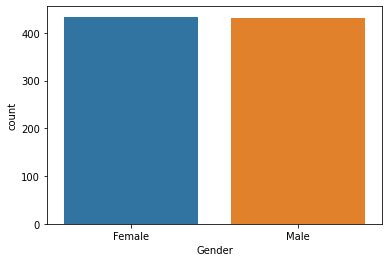

In [ ]:
sns.countplot('Gender',data=df)

In [ ]:
#creating dummise  converting female male to 1 0
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [ ]:
#joining original df with gender dummies df
df=pd.concat([df, gender_dummies],axis=1)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1


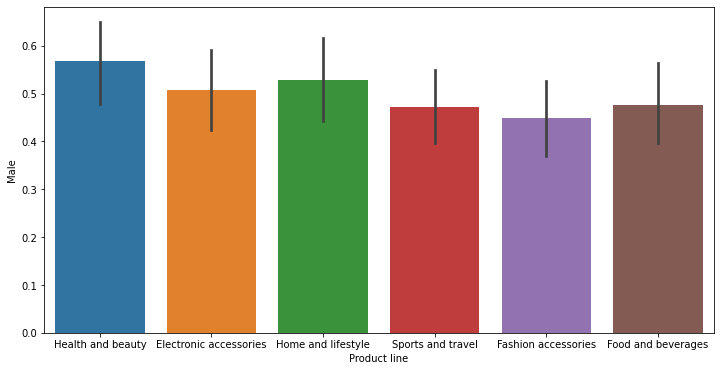

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Male',data=df)

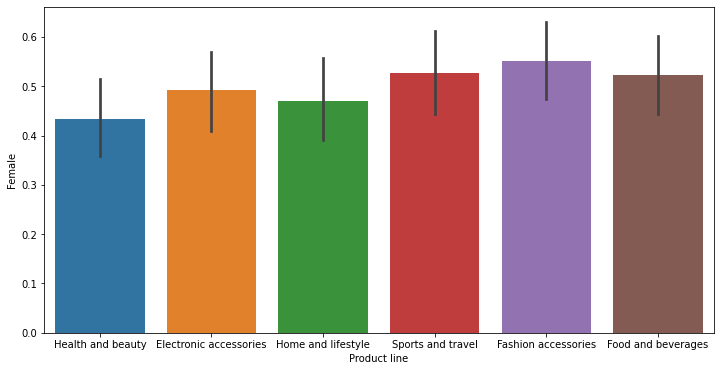

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product line',y='Female',data=df)

In [ ]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,300
Mandalay,284
Naypyitaw,281


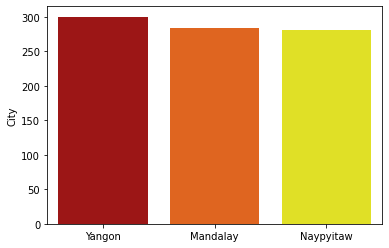

In [ ]:
sns.barplot(x = place_df.index ,y=place_df['City'],palette='hot')

In [ ]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df


,Payment
Cash,310
Ewallet,289
Credit card,266


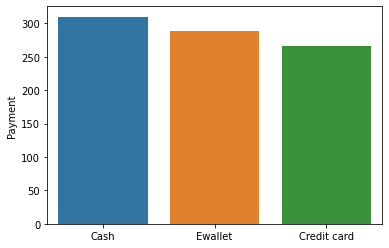

In [ ]:
sns.barplot(x = payment_df.index ,y=payment_df.Payment)

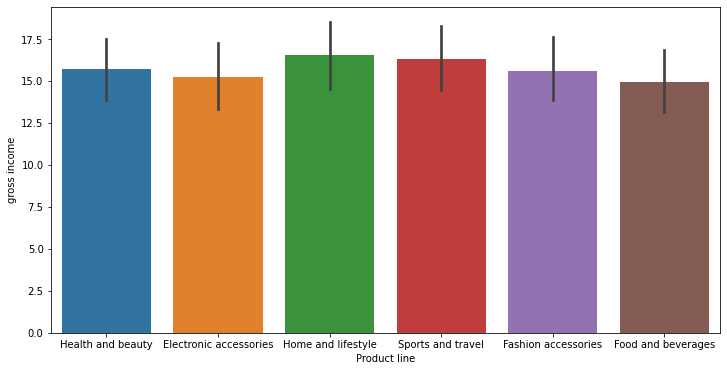

In [ ]:
#getting gross income plot for each product line which product getting more profit
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'], y=df['gross income'])

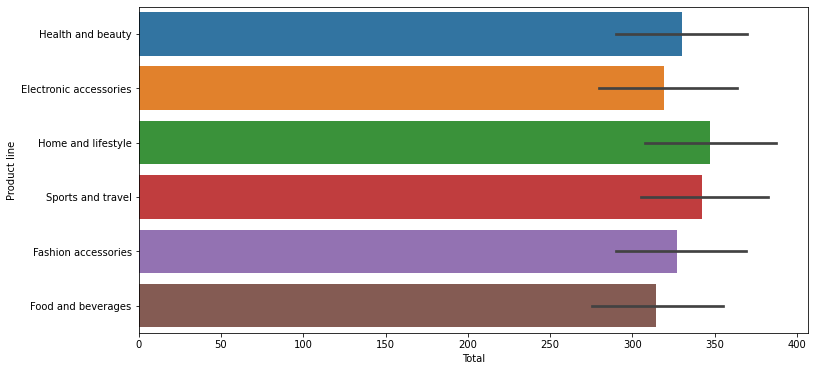

In [ ]:
#total bill in each product line
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'], y=df['Product line'])

Exploring quantity column

([<matplotlib.axis.XTick at 0x7f9707dd7290>,
 <a list of 11 Text major ticklabel objects>)

<Figure size 864x432 with 0 Axes>

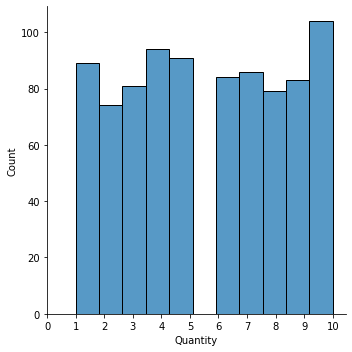

In [ ]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.displot(df['Quantity'])
plt.xticks(xdata)

In [ ]:
quality_df = pd.DataFrame(df['Quantity'].value_counts())
quality_df

,Quantity
10.0,104
4.0,94
5.0,91
1.0,89
7.0,86
6.0,84
9.0,83
3.0,81
8.0,79
2.0,74


## Task 2: Univariate Analysis

([<matplotlib.axis.XTick at 0x7f9708061cd0>,
 <a list of 11 Text major ticklabel objects>)

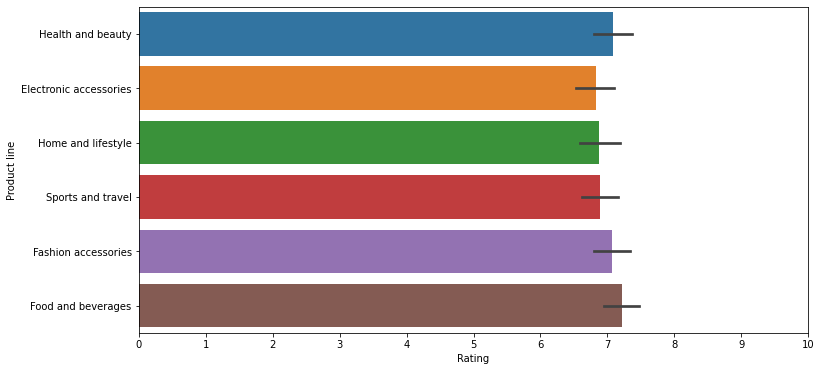

In [ ]:
#getting rating plot for each product line
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.xticks(xdata)

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?  -->from above analysis it is clear that  food and beverages having more rating

**Question 2:** Do aggregate sales numbers differ by much between branches?

## Task 3: Bivariate Analysis

plotting heatmap to check correlation between columns

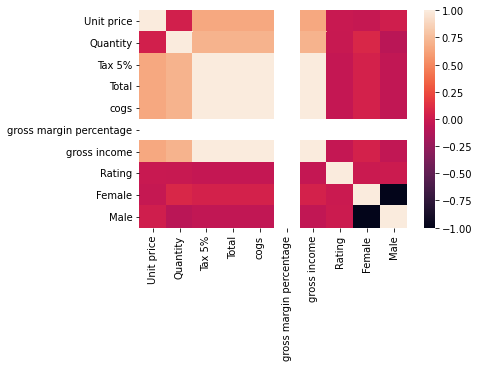

In [ ]:
sns.heatmap(df.corr())

**Question 3:** Is there a relationship between gross income and customer ratings?

rating and gross income are not related as their color is darker: their is no any column corelated with rating


## Task 4: Dealing With Duplicate Rows and Missing Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
990     False
991     False
998     False
999     False
1000     True
Length: 865, dtype: bool